<a href="https://colab.research.google.com/github/ian-mutai0/Financial-Inclusion-Project/blob/main/Ian_Mutai_Core_Week_2_Independent_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FINANCIAL INCLUSION PROJECT

# 1. Defining the question

## Specifying the specific data analytic question

How we can predict which individuals are most likely to have or use a bank account.

## Defining the Metric for Success

Being able to predict which individuals are most likely to have or use a bank account

## Understanding the Context

Financial Inclusion remains one of the main obstacles to economic and human development in Africa.
Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion. Despite the proliferation of mobile money in Africa and the growth of innovative fintech solutions, banks still play a pivotal role in facilitating access to financial services. Access to bank accounts enables households to save and facilitate payments while also helping businesses build up their credit-worthiness and improve their access to other financial services. 
Financial inclusion also helps in the overall economic development of the underprivileged population living in rural areas. 

## Recording the Experimental Design

- Reading the datasets into our environment. 
- Tidying the data by checking for outliers, null values and duplicates and dealing with them. 
- Performing univariate, bivariate and multivariate analysis and recording the observations.
- Implementing the solution by performing the respective analysis i.e. principal component analysis and discriminant analysis.
- Challenge your solution by providing insights on how you can make improvements.

## Data Relevance

The data we have is relevant since we need key demographic factors such as age, income, household size, gender, marital status, type of job and level of education to provide an indication of the state of financial inclusion in the respective countries. 

# 2. Importing the relevant libraries

In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

# 3. Reading the data

In [2]:
# Loading the dataset into our environment
finance = pd.read_csv('/content/Financial Dataset - 1.csv')
finance


,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed


# 4. Checking the Data

In [3]:
# Determining the no. of records in our data
finance.shape

#The data has 23524 rows and 13 columns

(23524, 13)

In [4]:
# Previewing the top of the dataset
finance.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [5]:
# Previewing the bottom of the dataset
finance.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [6]:
# Checking the datatypes of the columns
finance.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

# 5. External Data Source Validation

 Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

An example would be suppose that you're working with a dataset on the surveys ranging from 2016 to 2018 of countries. Validating such information with an external reliable resource such as Finscope surveys in 2018 would be important step to providing credibility to your dataset. Have a look at the following link for an example. [Link](http://www.fsdt.or.tz/wp-content/uploads/2017/09/Finscope.pdf) [Link](https://fsduganda.or.ug/wp-content/uploads/2018/10/FinScope-Uganda-Survey-Report-2018.pdf)

# 6. Tidying the Data

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


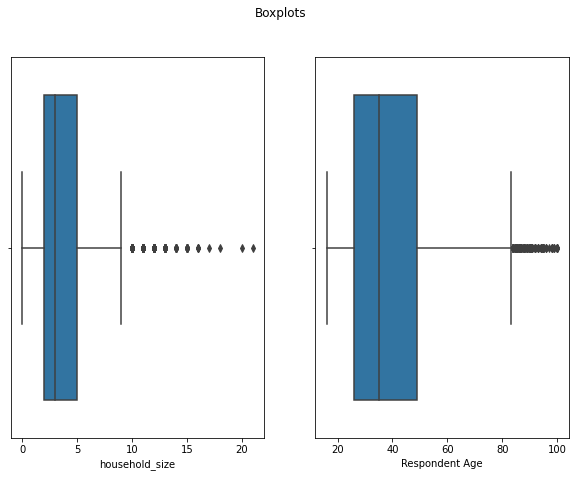

In [7]:
# Checking for outliers
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10, 7))
fig.suptitle('Boxplots')
sns.boxplot(finance['household_size'], ax=ax1)
sns.boxplot(finance['Respondent Age'], ax=ax2)
plt.show()

In [8]:
# Checking for anomalies
#Checking for Anomalies
#q1_1 = df['household_size'].quantile(.25)
#q3_1 = df['household_size'].quantile(.75)

#q1_3, q3_3 = np.percentile(finance['household_size'], [25, 75]) 

#iqr = q3_3 - q1_3

#l_bound = q1_1 - (1.5*iqr)
#u_bound = q3_3 + (1.5 * iqr)

#q1_3, q3_3 = np.percentile(finance['respondent_age'], [25, 75]) 

#iqr = q3_3 - q1_3

#l_bound = q1_1 - (1.5*iqr)
#u_bound = q3

#u_bound = q3_3 + (1.5 * iqr)
#print(iqr_1, iqr)
#print(iqr_2, iqr)

In [9]:
# Checking for missing data
finance.isnull().any()
finance.isnull().sum()

# There are quite a number of null values in our dataset

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

In [10]:
# Dealing with the missing data
finance.dropna(inplace=True)

In [11]:
# Checking for consistency
finance.duplicated().any()

# There are no duplicate values in the dataset

False

In [12]:
# Checking for unwanted/unneccesary columns
finance.drop("uniqueid", axis=1, inplace=True)
finance.drop("The relathip with head", axis=1, inplace=True)

In [13]:
# #changing column names to lower case and placing underscore to make them more presentable
finance.columns = finance.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
finance.head()

,country,year,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,marital_status,level_of_educuation,type_of_job
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5.0,26.0,Male,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5.0,34.0,Female,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8.0,26.0,Male,Single/Never Married,Primary education,Informally employed


In [46]:
# Renaming the columns
finance.rename(columns={'level_of_educuation':'level_of_education'},inplace=True)
finance.dtypes

country                  object
year                      int64
has_a_bank_account       object
type_of_location         object
cell_phone_access        object
household_size          float64
respondent_age          float64
gender_of_respondent     object
marital_status           object
level_of_education       object
type_of_job              object
dtype: object

In [47]:
# Dropping irrelevant data
# We noticed that the year column has years > 2018 so we'd have to drop them
finance.drop(finance[finance['year'] > 2018].index, inplace=True)
finance

,country,year,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,marital_status,level_of_education,type_of_job
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5.0,26.0,Male,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5.0,34.0,Female,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8.0,26.0,Male,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,No,Rural,Yes,4.0,48.0,Female,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,No,Rural,Yes,2.0,27.0,Female,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,No,Rural,Yes,5.0,27.0,Female,Widowed,Primary education,Other Income
23522,Uganda,2018,No,Urban,Yes,7.0,30.0,Female,Divorced/Seperated,Secondary education,Self employed


# 7. Exploratory Data Analysis

# Univariate Analysis

## Categorical Variables

### Frequency Tables

In [16]:
# Frequency Tables
gender = finance.gender_of_respondent.value_counts()
print("The frequency table of gender is: \n", gender)
print("\n")

country = finance.country.value_counts()
print("The frequency table of countries is: \n", country)
print("\n")

bank = finance.has_a_bank_account.value_counts()
print("The frequency table of people with bank accounts: \n", bank)
print("\n")

education = finance.cell_phone_access.value_counts()
print("The frequency table of people with cell phone access: \n", education)
print("\n")

location = finance.type_of_location.value_counts()
print("The frequency table of the type of location: \n", location)
print("\n")

The frequency table of gender is: 
 Female    13766
Male       9574
Name: gender_of_respondent, dtype: int64


The frequency table of countries is: 
 Rwanda      8683
Tanzania    6500
Kenya       6062
Uganda      2095
Name: country, dtype: int64


The frequency table of people with bank accounts: 
 No     20044
Yes     3296
Name: has_a_bank_account, dtype: int64


The frequency table of people with cell phone access: 
 Yes    17331
No      6009
Name: cell_phone_access, dtype: int64


The frequency table of the type of location: 
 Rural    14263
Urban     9077
Name: type_of_location, dtype: int64




### Histograms

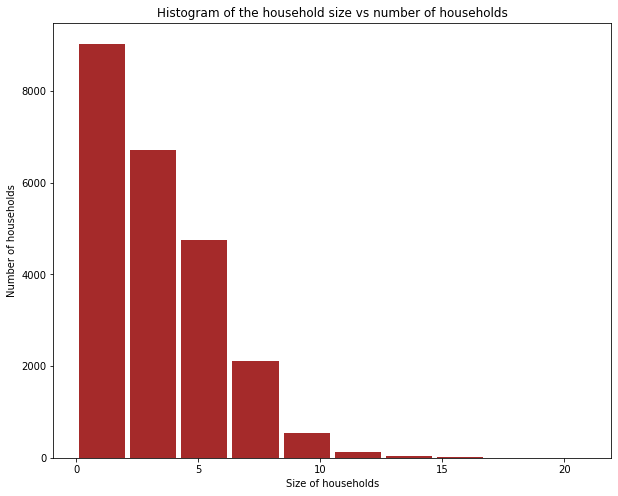

In [17]:
# Histogram of household size
household_size = finance['household_size']
fig=plt.figure(figsize=(10,8))
plt.hist(household_size, bins=10, histtype='bar', color='brown', rwidth=0.9)
plt.title("Histogram of the household size vs number of households")
plt.xlabel("Size of households")
plt.ylabel("Number of households")
plt.show()

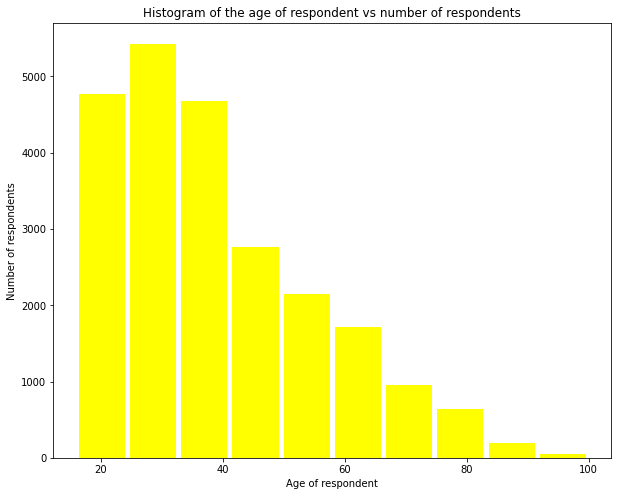

In [18]:
# Histogram of respondents' age
age = finance['respondent_age']
fig=plt.figure(figsize=(10,8))
plt.hist(age, bins=10, histtype='bar', color='yellow', rwidth=0.9)
plt.title("Histogram of the age of respondent vs number of respondents")
plt.xlabel("Age of respondent")
plt.ylabel("Number of respondents")
plt.show()

### Pie charts

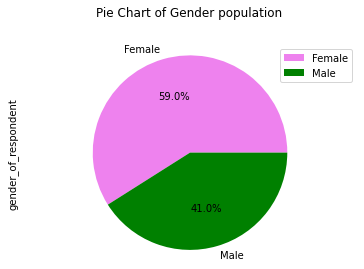

In [19]:
# Pie chart of gender distribution
#finance['gender_of_respondent'].value_counts().plot(kind='pie')
finance['gender_of_respondent'].value_counts().plot(kind='pie',colors=['violet','green'], autopct='%1.1f%%')
fig=plt.gcf()
#fig.set_size_inches(10,10)
#plt.pie(gender,labels= gender,colors=colors,autopct = '%1.1f%%', shadow = True, startangle = 140)
plt.axis('equal')
plt.legend(loc='upper right')
plt.title('Pie Chart of Gender population', y=1.1)
plt.show()

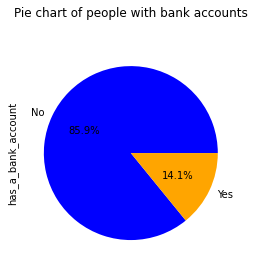

In [20]:
# Pie chart of people who have a bank account or not
finance['has_a_bank_account'].value_counts().plot(kind='pie',colors=['blue','orange'], autopct='%1.1f%%')
plt.title("Pie chart of people with bank accounts", y=1.1)
plt.show()

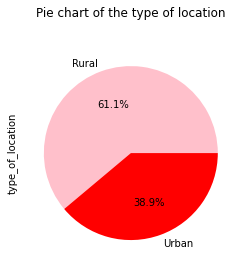

In [21]:
# Pie chart for type of location
finance['type_of_location'].value_counts().plot(kind='pie',colors=['pink','red'], autopct='%1.1f%%')
plt.title("Pie chart of the type of location", y=1.1)
plt.show()

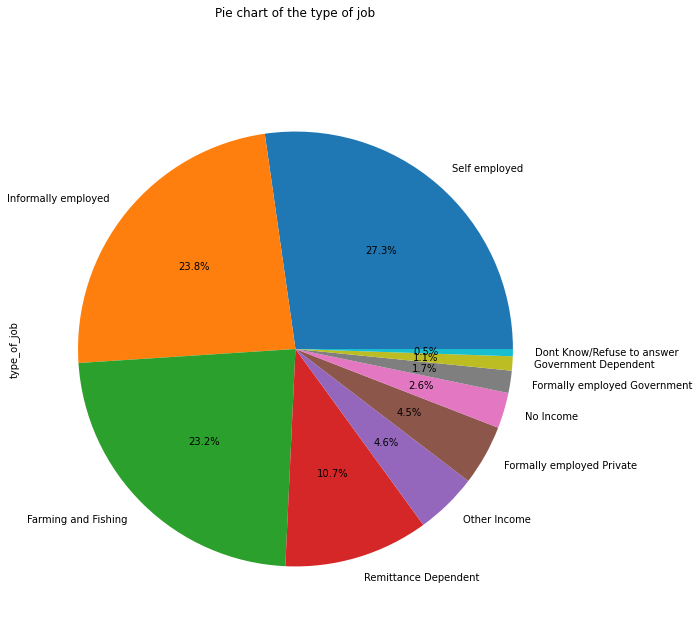

In [22]:
# Pie chart of type of job
finance['type_of_job'].value_counts().plot(kind='pie', autopct='%1.1f%%')
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.title("Pie chart of the type of job", y=1.1)
plt.show()

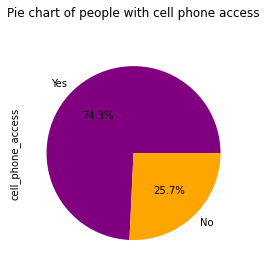

In [23]:
# Pie chart of cell phone access 
finance['cell_phone_access'].value_counts().plot(kind='pie',colors=['purple','orange'], autopct='%1.1f%%')
plt.title("Pie chart of people with cell phone access",y=1.1)
plt.show()

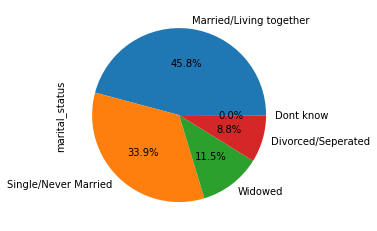

In [24]:
# Pie chart of marital status
finance['marital_status'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.show()

## Numerical Variables

### Measures of central tendency

In [25]:
# Measures of central tendency for the household size
# Mean 
household_mean = finance['household_size'].mean()
print("The average household size is: \n", household_mean)
print('\n')

# Mode 
household_mode = finance['household_size'].mode()
print("The mode of the household size is: \n", household_mode)
print('\n')

# Median
household_median = finance['household_size'].median()
print("The median of the household size: \n", household_median)
print('\n')



The average household size is: 
 3.688560411311054


The mode of the household size is: 
 0    2.0
dtype: float64


The median of the household size: 
 3.0




In [26]:
# Measures of central tendency for the respondents' age
# Mean 
age_mean = finance['respondent_age'].mean()
print("The average respondents' age is: \n", age_mean)
print('\n')

# Mode 
age_mode = finance['respondent_age'].mode()
print("The mode of the respondents' age is: \n", age_mode)
print('\n')

# Median
age_median = finance['respondent_age'].median()
print("The median of the respondents' age is: \n", age_median)
print('\n')


The average respondents' age is: 
 38.80706940874036


The mode of the respondents' age is: 
 0    30.0
dtype: float64


The median of the respondents' age is: 
 35.0




### Measures of Dispersion


In [27]:
# Standard Deviation
household_std = finance['household_size'].std()
print("The standard deviation of the household size is: \n", household_std)
print('\n')

age_std = finance['respondent_age'].std()
print("The standard deviation of the respondent age is: \n", age_std)
print('\n')


The standard deviation of the household size is: 
 2.2812745975350435


The standard deviation of the respondent age is: 
 16.519904564514412




In [28]:
# Variance
household_var = finance['household_size'].var()
print("The variance of the household size is: \n", household_var)
print('\n')

age_var = finance['respondent_age'].var()
print("The variance of the respondents' ages is: \n", age_var)
print('\n')

The variance of the household size is: 
 5.204213789358675


The variance of the respondents' ages is: 
 272.90724682066417




In [29]:
# Range
household_max = finance['household_size'].max()
household_min = finance['household_size'].min()
range = household_max - household_min 
print("The range in the household size is: \n", range)
print('\n')

age_max = finance['respondent_age'].max()
age_min = finance['respondent_age'].min()
range = age_max - age_min 
print("The range in the respondent  is: \n", range)
print('\n')

The range in the household size is: 
 21.0


The range in the respondent  is: 
 84.0




In [30]:
# Quantiles
household_quantiles = finance['household_size'].quantile([0.25,0.50,0.75])
print("The quantiles for the household size are: \n", household_quantiles)
print('\n')

household_quantiles = finance['respondent_age'].quantile([0.25,0.50,0.75])
print("The quantiles for the respondents' age are: \n", household_quantiles)
print('\n')

The quantiles for the household size are: 
 0.25    2.0
0.50    3.0
0.75    5.0
Name: household_size, dtype: float64


The quantiles for the respondents' age are: 
 0.25    26.0
0.50    35.0
0.75    49.0
Name: respondent_age, dtype: float64




In [31]:
# Skewness
house_skew = finance['household_size'].skew()
print("The skewness of the household size is: \n", house_skew)
if house_skew == 0:
  print("The distribution is symmetrical")
elif house_skew > 0:
  print("The distribution is positively skewed")
else:
  print("The distribution is negatively skewed")
print('\n')

age_skew = finance['respondent_age'].skew()
print("The skewness of the respondent age is: \n", age_skew)
if age_skew == 0:
  print("The distribution is symmetrical")
elif age_skew > 0:
  print("The distribution is positively skewed")
else:
  print("The distribution is negatively skewed")
print('\n')

The skewness of the household size is: 
 0.9741827150450616
The distribution is positively skewed


The skewness of the respondent age is: 
 0.8406145812311228
The distribution is positively skewed




In [32]:
# Kurtosis
house_kurt = finance['household_size'].kurt()
print("The kurtosis of the household size is: \n", house_kurt)

if house_kurt > 0:
  print("The household size column is leptokurtic")
elif house_kurt < 0:
  print("The household size is platykurtic")
else:
  print("The household size is mesokurtic")
print('\n') 

age_kurt = finance['respondent_age'].kurt()
print("The kurtosis of the respondent_age is: \n", age_kurt)

if age_kurt > 0:
  print("The household size column is leptokurtic")
elif age_kurt < 0:
  print("The household size is platykurtic")
else:
  print("The household size is mesokurtic")
print('\n') 

The kurtosis of the household size is: 
 1.1538357462528523
The household size column is leptokurtic


The kurtosis of the respondent_age is: 
 0.09826807013177241
The household size column is leptokurtic




In [33]:
# Summary statistics
house = finance['household_size'].describe()
print("The summary statistics for the household size are: \n", house)
print('\n')
age = finance['respondent_age'].describe()
print("The summary statistics for the respondents' age are: \n", age)

The summary statistics for the household size are: 
 count    23340.000000
mean         3.688560
std          2.281275
min          0.000000
25%          2.000000
50%          3.000000
75%          5.000000
max         21.000000
Name: household_size, dtype: float64


The summary statistics for the respondents' age are: 
 count    23340.000000
mean        38.807069
std         16.519905
min         16.000000
25%         26.000000
50%         35.000000
75%         49.000000
max        100.000000
Name: respondent_age, dtype: float64


### Visualization techniques

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


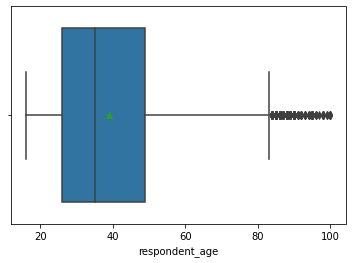

In [34]:
# Boxplot of respondents' age
sns.boxplot(finance['respondent_age'], showmeans=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


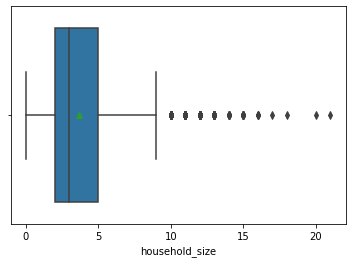

In [35]:
sns.boxplot(finance['household_size'], showmeans=True)

## Findings and Recommendations

- We were able to determine that most respondents who were interviewed were female. 
- We then realized that most respondents who were interviewed did not have bank accounts. 
- We were also able to determine that most respondents lived in rural locations.

Based on the above findings, we would recommend that awareness on the importance of financial services such as bank accounts to be made to people living in rural locations.

# Bivariate Analysis 

### Numerical and Numerical Variables

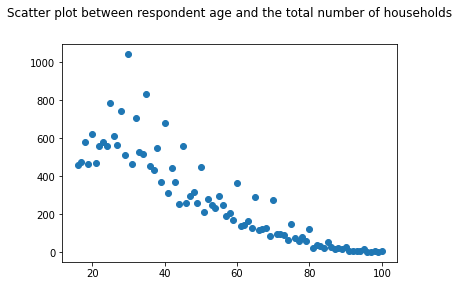

In [36]:
# Scatter plots
# First we can group the respondents' ages by household sizes
size=finance.groupby('respondent_age')['household_size'].count().reset_index(name='total number of households')
size
plt.scatter(size["respondent_age"] , size["total number of households"])
plt.title("Scatter plot between respondent age and the total number of households", y=1.1)
plt.show()


In [37]:
# Correlation 
# We can use the correlation matrix 
correlation = finance['respondent_age'].corr(finance['household_size'])
print("The correlation matrix is: \n", correlation)
print('\n')

if correlation == 0:
  print("The respondent's age has no correlation with the household size")
elif correlation > 0:
  print("The respondent's age is positively correlated to the household size")
else:
  print("The respondent's age is negatively correlated to the household size")
print('\n')


The correlation matrix is: 
 -0.11967115234154871


The respondent's age is negatively correlated to the household size




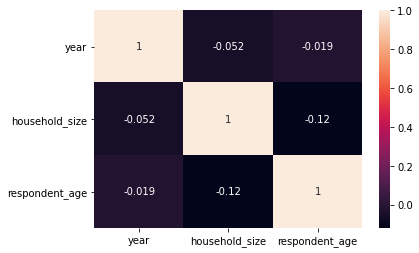

In [38]:
# Showing correlation on a heat map
sns.heatmap(finance.corr(),annot=True)
plt.show()

## Categorical and Categorical Variables

Text(0.5, 1.1, 'Number of people with bank accounts vs Type of Location')

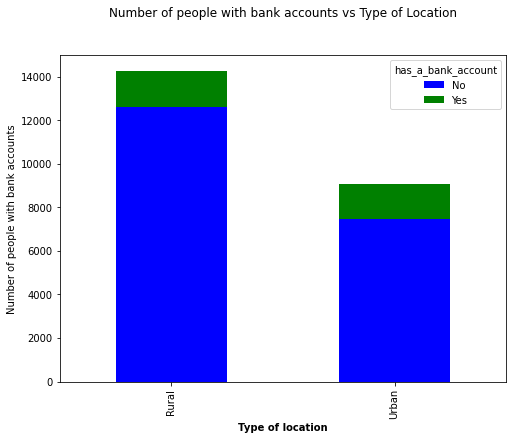

In [39]:
# Stacked column chart of type of location vs Has a bank account
finance.head()
pd.crosstab(finance['type_of_location'],finance['has_a_bank_account']).plot(kind="bar",stacked=True, figsize=(8,6), color=['blue','green'])
plt.xlabel("Type of location", fontsize=10, fontweight="bold")
plt.ylabel("Number of people with bank accounts")
plt.title("Number of people with bank accounts vs Type of Location", y=1.1)

Text(0.5, 1.1, 'Number of people with bank accounts vs Married status')

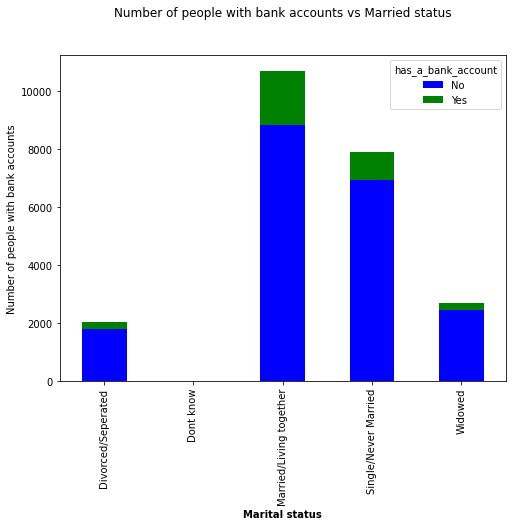

In [40]:
pd.crosstab(finance['marital_status'],finance['has_a_bank_account']).plot(kind="bar",stacked=True, figsize=(8,6), color=['blue','green'])
plt.xlabel("Marital status", fontsize=10, fontweight="bold")
plt.ylabel("Number of people with bank accounts")
plt.title("Number of people with bank accounts vs Married status", y=1.1)

Text(0.5, 1.1, 'Number of people with bank accounts vs Cell phone access')

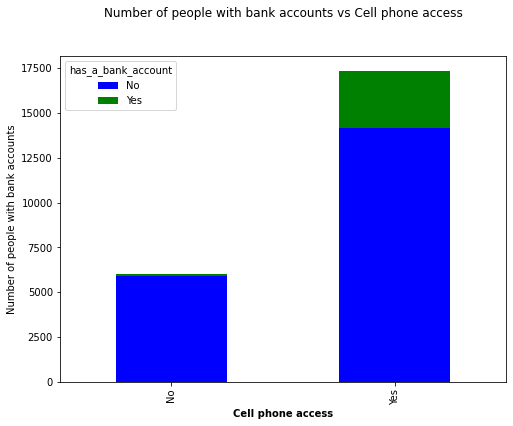

In [41]:
pd.crosstab(finance['cell_phone_access'],finance['has_a_bank_account']).plot(kind="bar",stacked=True, figsize=(8,6), color=['blue','green'])
plt.xlabel("Cell phone access", fontsize=10, fontweight="bold")
plt.ylabel("Number of people with bank accounts")
plt.title("Number of people with bank accounts vs Cell phone access", y=1.1)

Text(0.5, 1.1, 'Number of people with bank accounts vs Level of Education')

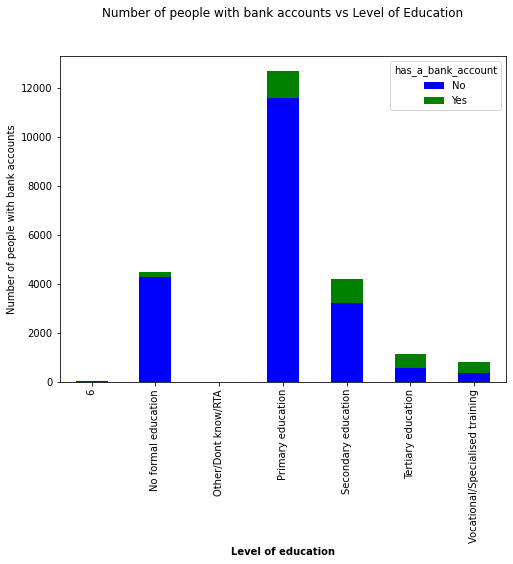

In [48]:
# Stacked column chart of people with bank accounts vs their level of education
pd.crosstab(finance['level_of_education'],finance['has_a_bank_account']).plot(kind="bar",stacked=True, figsize=(8,6), color=['blue','green'])
plt.xlabel("Level of education", fontsize=10, fontweight="bold")
plt.ylabel("Number of people with bank accounts")
plt.title("Number of people with bank accounts vs Level of Education", y=1.1)

## Categorical and Numerical Variables

In [ ]:
# Z-test 
from scipy import stats
age= finance['respondent_age']
size= finance['household_size']
age_zscore = stats.zscore(age)
print("The z score for respondents' age is: \n", age_zscore)
print('\n')

size_zscore = stats.zscore(size)
print("The z score for household size is: \n", size_zscore)
print('\n')

In [ ]:
# T test
gender=finance.groupby('has_a_bank_account')['gender_of_respondent'].value_counts().reset_index(name='Count per gender')
gender

yes=gender.loc[(gender['has_a_bank_account'] == 'Yes') & (gender['gender_of_respondent'])]
yes

no = gender.loc[(gender['has_a_bank_account'] == 'No') & (gender['gender_of_respondent'])]
no

from scipy.stats import ttest_ind
t_stat,p = ttest_ind(yes['Count per gender'],no['Count per gender'])
print(f't={t_stat}, p={p}')

## Findings and Recommendations

- We were able to determine that most people interviewed had a cell phone but less than 15% of them had no bank account. 

We would recommend that everyone having a cell phone should be educated on the importance of financial services such as bank accounts for the purposes of savings and investing. This in turn improves the economic development of a country and region. 

# Multivariate Analysis

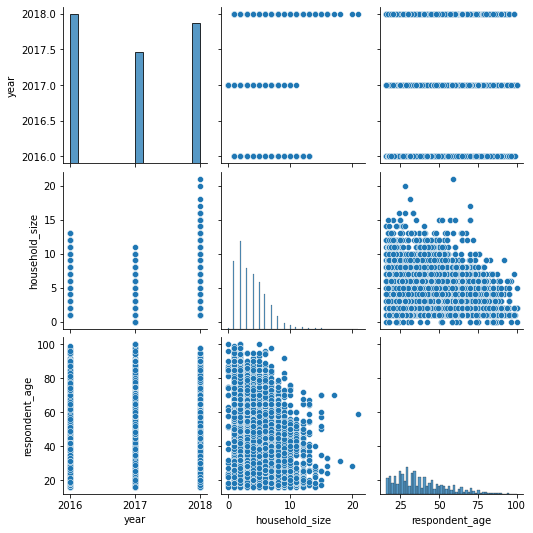

In [49]:
# We plot a pairplot to show the relationship between all the variables in our dataset
sns.pairplot(finance)
plt.show()

# Implementing the Solution

## Principal Component Analysis

In [50]:
# Dimensionality Reduction Techniques
# PCA 

# Lets drop the year column since we won't use it 
finance.drop('year', axis=1, inplace=True)
# We could go ahead to preview our dataset
finance.head()

,country,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,marital_status,level_of_education,type_of_job
0,Kenya,Yes,Rural,Yes,3.0,24.0,Female,Married/Living together,Secondary education,Self employed
1,Kenya,No,Rural,No,5.0,70.0,Female,Widowed,No formal education,Government Dependent
2,Kenya,Yes,Urban,Yes,5.0,26.0,Male,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,No,Rural,Yes,5.0,34.0,Female,Married/Living together,Primary education,Formally employed Private
4,Kenya,No,Urban,No,8.0,26.0,Male,Single/Never Married,Primary education,Informally employed


In [64]:
# Preprocessing
# The first preprocessing step is to divide the dataset into a feature set and corresponding labels.
# X are the feature variables while Y are the corresponding labels

X = finance.drop(['country', 'has_a_bank_account', 'type_of_location', 'cell_phone_access', 'gender_of_respondent', 'marital_status', 'level_of_education', 'type_of_job'], axis=1)
#Y = finance[['country', 'has_a_bank_account','type_of_location', 'cell_phone_access', 'gender_of_respondent', 'marital_status', 'level_of_educuation', 'type_of_job']]
Y = finance['has_a_bank_account']

In [65]:
# Splitting the dataset into the Training set and Test set
# The next preprocessing step is to divide data into training and test sets.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [66]:
# Normalization 
# We will perform standard scalar normalization to normalize our feature set.
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [67]:
# Applying PCA
# Initialize the PCA class by passing the number of components to the constructor.
# Call the fit and then transform methods by passing the feature set to these methods. 
# The transform method returns the specified number of principal components.
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [68]:
# Explained Variance Ratio
# The PCA class contains explained_variance_ratio_ which returns the variance caused by each of the principal components
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.55968711, 0.44031289])

In [69]:
# Training and Making Predictions
# In this case we'll use random forest classification for making the predictions.
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_pred

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [70]:
# Performance Evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

[[4036    0]
 [ 632    0]]
Accuracy 0.8646101113967438


## Findings 

The Principal Component Analysis reduction technique is giving us an accuracy of 86% which means that we could require more conclusive data to give us a higher prediction on whether a person is most likely to have or use a bank account

# 8. Challenging the Solution

## Linear Discriminant Analysis (LDA)

In [71]:
# We could challenge the solution by comparing using another dimensionality reduction technique
# LDA (Linear Discriminant Analysis)
# First we preview the data
finance.head()

,country,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,marital_status,level_of_education,type_of_job
0,Kenya,Yes,Rural,Yes,3.0,24.0,Female,Married/Living together,Secondary education,Self employed
1,Kenya,No,Rural,No,5.0,70.0,Female,Widowed,No formal education,Government Dependent
2,Kenya,Yes,Urban,Yes,5.0,26.0,Male,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,No,Rural,Yes,5.0,34.0,Female,Married/Living together,Primary education,Formally employed Private
4,Kenya,No,Urban,No,8.0,26.0,Male,Single/Never Married,Primary education,Informally employed


In [72]:
# Preprocessing
# The first preprocessing step is to divide the dataset into a feature set and corresponding labels.
# X are the feature variables while Y are the corresponding labels

X = finance.drop(['country', 'has_a_bank_account', 'type_of_location', 'cell_phone_access', 'gender_of_respondent', 'marital_status', 'level_of_education', 'type_of_job'], axis=1)
#Y = finance[['country', 'has_a_bank_account','type_of_location', 'cell_phone_access', 'gender_of_respondent', 'marital_status', 'level_of_educuation', 'type_of_job']]
Y = finance['has_a_bank_account']

In [73]:
# Splitting the dataset into the Training set and Test set
# The next preprocessing step is to divide data into training and test sets.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [74]:
# Normalization 
# We will perform standard scalar normalization to normalize our feature set.
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [75]:
# Performing LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [76]:
# Training and Making Predictions
# We will use the random forest classifier to evaluate the performance of a LDA-reduced algorithms as shown
# 

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [77]:
# Performance Evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

[[4036    0]
 [ 632    0]]
Accuracy 0.8646101113967438


## Findings and Recommendations

The Linear Discriminant Analysis reduction technique also gives us the same accuracy of 86% which means that we need extra data to be able to accurately predict whether a person has a bank account. 
- We would recommend adding an extra feature label, e.g income of the respondent to increase the prediction accuracy of whether a person is most likely to have a bank account. 

# 9. Follow up Questions

## Did we have the right data ?

We had the right data since after using PCA and LDA dimensionality reduction techniques, we were able to achieve 86% prediction accuracy on whether a person has a bank account or not. 

## Do we need other data to answer our question ?

Yes we need an income column which shows the annual income of every respondent so that we are able to increase the accuracy of predicting whether a person has a bank account or not. Income data would enable us to predict whether a respondent requires a bank account for purposes such as saving and investing. 

## Did we have the right question ?

Yes we had the right question since key demographic factors such as age, marital status, type of location, type of job and the level of education help drive the financial outcome of an individual. Thus if we are able to predict whether a person has a bank account or not, we can be able to tell the availability and equality of opportunities to access financial services which is an indication of the state of financial inclusion in East Africa. 